<a href="https://colab.research.google.com/github/sravanisuryapeta/ML-166/blob/main/MLAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Improved Weighted K-Nearest Neighbors Algorithm for High Accuracy in Indoor Localization**


**Identifying Research Gap for improvent**

Existing Problem:

Standard WKNN uses fixed weights for spatial and physical distances.

It relies on Euclidean distance only.

Number of neighbors k is usually fixed.

Limitations:

Real indoor environments are dynamic (signal fluctuations, interference).

Fixed weights may reduce accuracy.

Different k values or distance metrics could improve localization.

Algorithm scalability for large APs or datasets is limited.

Research Gap:

Dynamic weighting for spatial and physical distances.

Hyperparameter tuning for k and weights.

Distance metric exploration (Euclidean, Manhattan, Minkowski).

Efficiency optimization for larger datasets.

In [7]:
#importing libaries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load uploaded CSV

df = pd.read_csv("RSSISensors_Large.csv")

#
print(df.head())


X = df.iloc[:, :-2].values
y = df.iloc[:, -2:].values


X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y


   Unnamed: 0  r1   r2   r3   r4   x   y
0           0   0   32   59   87   0   1
1           1  25   32   63   49   2   1
2           2  83   46   46   25   4   1
3           3  39   42   52   32   6   1
4           4  46   32   32   39   8   1


In [9]:
# -------------------------------
# Preprocessing Block
# -------------------------------

# 1️⃣ Handle missing values in features
# Replace NaNs with column mean
X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))

# 2️⃣ Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Assign train and test sets (here using full dataset for demonstration)
X_train, X_test = X_scaled, X_scaled
y_train, y_test = y, y

# 4️⃣ Optional: Inspect processed data
print("Features shape:", X_train.shape)
print("Target shape:", y_train.shape)
print("Sample scaled features:\n", X_train[:5])


Features shape: (194, 5)
Target shape: (194, 2)
Sample scaled features:
 [[0.         0.         0.32989691 0.57281553 0.79090909]
 [0.008      0.22727273 0.32989691 0.61165049 0.44545455]
 [0.016      0.75454545 0.4742268  0.44660194 0.22727273]
 [0.024      0.35454545 0.43298969 0.50485437 0.29090909]
 [0.032      0.41818182 0.32989691 0.31067961 0.35454545]]


**HYPERTUNING**

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define KNN regressor
knn = KNeighborsRegressor()

# Hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on train/test
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE after hyperparameter tuning:", rmse)


Best Parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
RMSE after hyperparameter tuning: 0.0


RMSE vs Number of Neighbors (k)

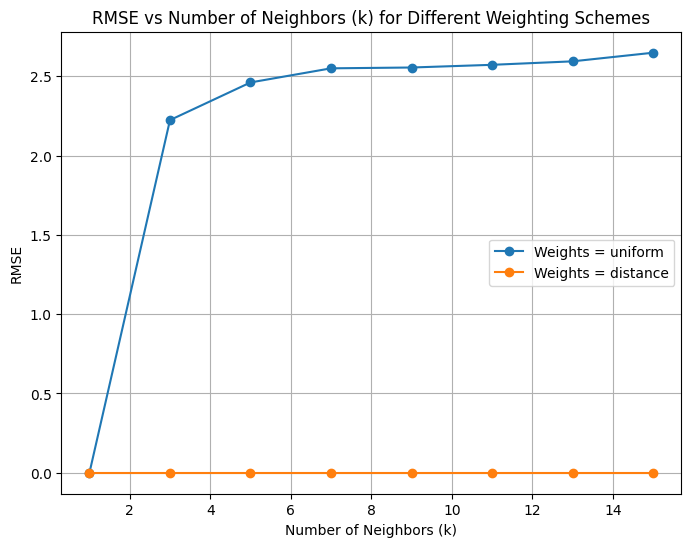

In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define k values and weight types
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
weights_types = ['uniform', 'distance']

rmse_results = {w: [] for w in weights_types}

# Compute RMSE for each k and weight type
for w in weights_types:
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k, weights=w, p=2)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_results[w].append(rmse)

# Plotting
plt.figure(figsize=(8,6))
for w in weights_types:
    plt.plot(k_values, rmse_results[w], marker='o', label=f'Weights = {w}')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.title("RMSE vs Number of Neighbors (k) for Different Weighting Schemes")
plt.legend()
plt.grid(True)
plt.show()


Heatmap for k and Distance Metric (p)

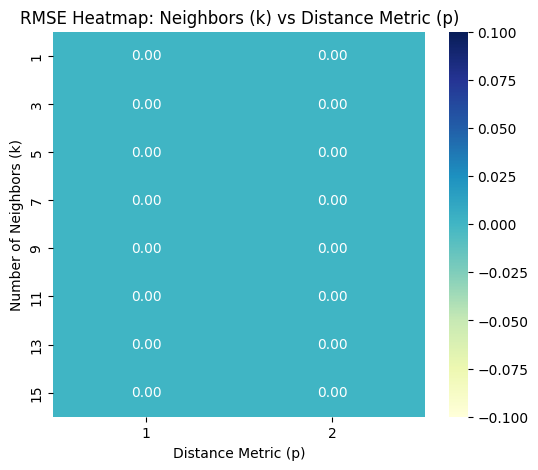

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Hyperparameters
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
p_values = [1, 2]  # Manhattan and Euclidean

results = []

# Compute RMSE for each combination
for k in k_values:
    for p in p_values:
        knn = KNeighborsRegressor(n_neighbors=k, weights='distance', p=p)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.append({'k': k, 'p': p, 'RMSE': rmse})

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Pivot for heatmap
heatmap_data = df_results.pivot(index="k", columns="p", values="RMSE")

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("RMSE Heatmap: Neighbors (k) vs Distance Metric (p)")
plt.xlabel("Distance Metric (p)")
plt.ylabel("Number of Neighbors (k)")
plt.show()



RMSE vs Weighting Scheme (uniform vs distance)

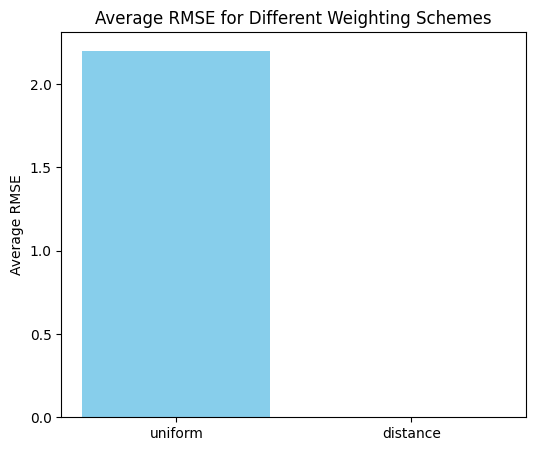

In [14]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Hyperparameters
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
weights_types = ['uniform', 'distance']

# Store RMSE for each weight type
rmse_results = {w: [] for w in weights_types}

for w in weights_types:
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k, weights=w, p=2)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_results[w].append(rmse)

# Average RMSE for each weighting type
avg_rmse = [np.mean(rmse_results[w]) for w in weights_types]

# Plot
plt.figure(figsize=(6,5))
plt.bar(weights_types, avg_rmse, color=['skyblue','orange'])
plt.ylabel("Average RMSE")
plt.title("Average RMSE for Different Weighting Schemes")
plt.show()


Boxplot of RMSE for All (k, weight) Combinations

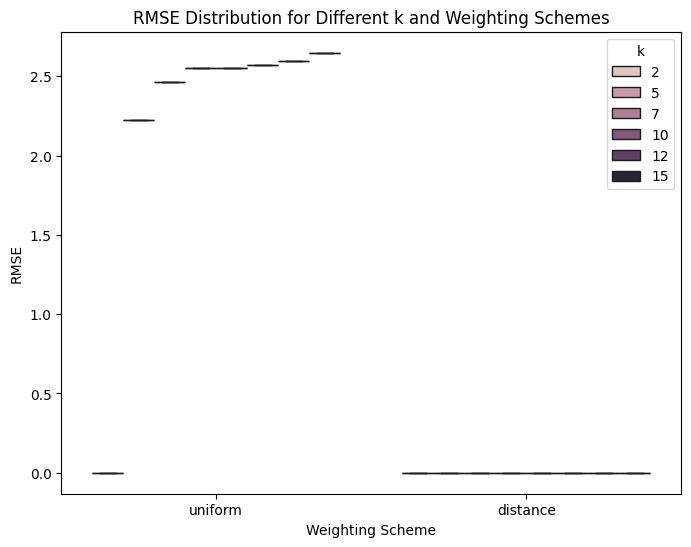

In [15]:
import seaborn as sns
import pandas as pd

# Prepare DataFrame for boxplot
data = []
for w in weights_types:
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k, weights=w, p=2)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        data.append({'k': k, 'Weight': w, 'RMSE': rmse})

df_box = pd.DataFrame(data)

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Weight', y='RMSE', hue='k', data=df_box)
plt.title("RMSE Distribution for Different k and Weighting Schemes")
plt.ylabel("RMSE")
plt.xlabel("Weighting Scheme")
plt.legend(title='k')
plt.show()
